In [34]:
import sys
sys.path.append('..')

import io
import pickle

import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.neighbors import NearestNeighbors

from src.sanity_check import is_valid
from src.text_processing import WordExtractor

In [2]:
def load_vectors(fname):
    fin = io.open(fname, 'r', encoding='utf-8', newline='\n', errors='ignore')
    n, d = map(int, fin.readline().split())
    data = {}
    for line in tqdm(fin):
        tokens = line.rstrip().split(' ')
        data[tokens[0]] = np.array([float(n)
                                    for n in tokens[1:]])
    return data

In [3]:
word_vectors = load_vectors('data/crawl-300d-2M.vec')

1999995it [03:57, 8426.17it/s]


In [4]:
with open('notebooks/icon_data.pkl', 'rb') as f:
    images, alt_texts = pickle.load(f)

In [31]:
valid_idxs = [idx
              for idx, alt_text in enumerate(alt_texts)
             if is_valid(alt_text)]
images = [images[idx]
          for idx in valid_idxs]
alt_texts = [alt_texts[idx]
             for idx in valid_idxs]

In [32]:
word_extractor = WordExtractor()

In [40]:
mean_word_embeddings = [np.mean([word_vectors.get(word, np.zeros(300)) 
                                 for word in word_extractor.extract(alt_text)], axis=0)
                        for alt_text in tqdm(alt_texts)]


100%|██████████| 18728/18728 [00:01<00:00, 12352.16it/s]

In [61]:
new_mean_word_embeddings = []
for word_embedding in mean_word_embeddings:
    if word_embedding.shape == (300,):
        new_mean_word_embeddings.append(word_embedding)
    else:
        new_mean_word_embeddings.append(np.zeros(300))

mean_word_embeddings = list(new_mean_word_embeddings)

In [66]:
nn_search = NearestNeighbors(n_neighbors=10, metric='cosine')
nn_search.fit(mean_word_embeddings)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='cosine',
         metric_params=None, n_jobs=1, n_neighbors=10, p=2, radius=1.0)

automotive
[ 2200 14114  7505 11051   960 18267  8372 17645  3473  5913]
['automotive', 'Auto', 'Motorsport network', 'Texas Department of Motor Vehicles', 'Sauber Motorsport AG', 'Toyota Motorsport GmbH logo image', 'car', 'FUR-12 CAR', 'Industry', 'Sauber Motorsport AG logo image']


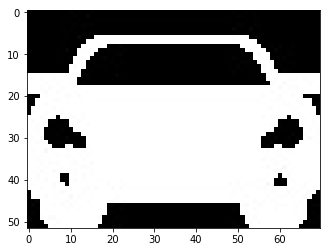

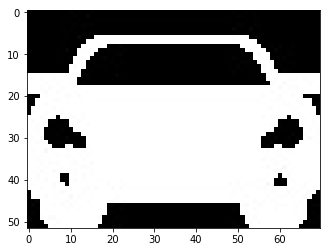

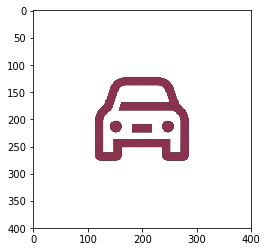

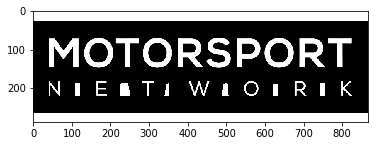

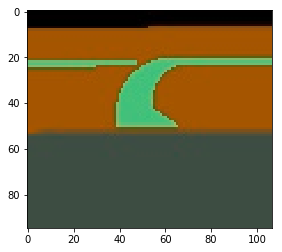

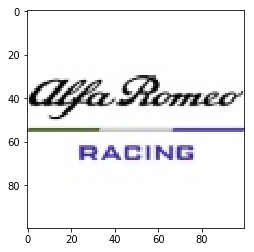

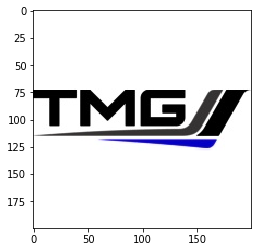

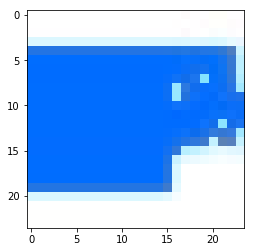

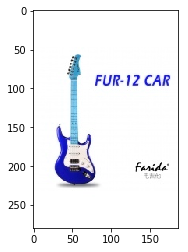

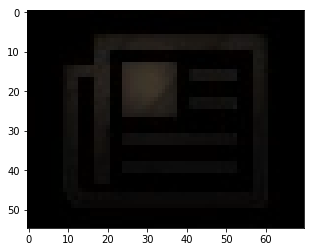

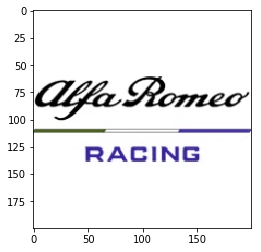

In [72]:
idx = 2200
print(alt_texts[idx])
plt.figure()
plt.imshow(images[idx])

nn_idxs = nn_search.kneighbors([mean_word_embeddings[idx]])[1][0]
print(nn_idxs)
print([alt_texts[idx]
       for idx in nn_idxs])

for idx in nn_idxs:
    plt.figure()
    plt.imshow(images[idx])
plt.show()